# Classifying Blood Cell by Shape
- Charles Kulick, Jake Bentley, James McNeice

## Goal

- Our purpose in this project is to classify blood cells utilizing geometric machine learning.
- Geometric machine learning is ideal for this task because each cell is easily represented by closed curves.

#### Why it matters

- A [blood differential test](https://www.ucsfhealth.org/medical-tests/blood-differential-test#:~:text=Neutrophils%3A%2040%25%20to%2060%25,Eosinophils%3A%201%25%20to%204%25) involves counting the number of various types of white blood cells and comparing them to other types.
- Step in diagnosing 'an infection, anemia, or leukemia'. 
- Ensuring various treatments are having desired effects.
- Neutrophils, for example, are the most common composing 40-60% of all white blood cells .
- In order to perform this test a blood sample is taken, stained, and cells are then counted, typically [by a person](https://www.mountsinai.org/health-library/tests/blood-differential-test#:~:text=A%20laboratory%20specialist%20takes%20a,Neutrophils).
- This process could be greatly expedited by removing the need for a human to count the cells.

## The Data

 The dataset consists of roughly 17000 .jpgs of size 360 $\times$ 363. Each image is of a healthy cell not undergoing any sort of treatment. There are 8 types: neutrophils, eosinophils, basophils, lymphocytes, monocytes, immature granulocytes, erythroblasts, and platelets (which are not included in our analysis as opening the file results in a crash).

Erythroblast
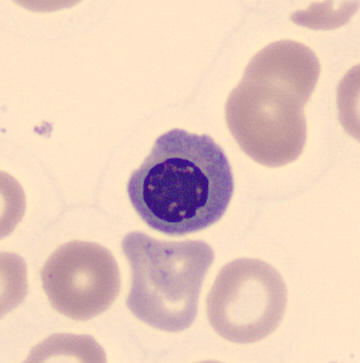

Neutrophil
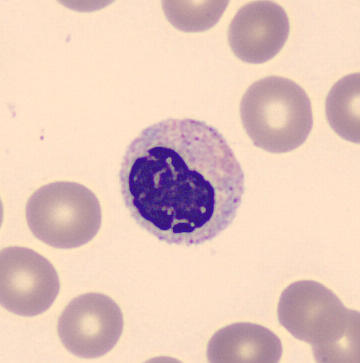

Monocyte
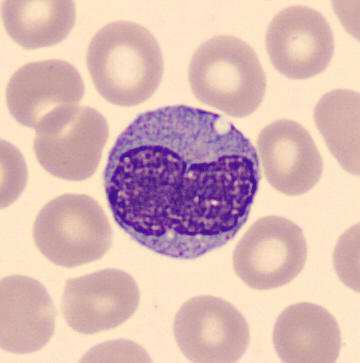

As our dataset is number of images we had to find a way to represent the shape of interest within the image.
In order to do this we use scikit image to find contours along the edges of each cell.
This output an array of booleans at each pixel, to this we applied a search algorithm which output the path coordinates of the curve contained in this array.

We were interested in comparing accuracy between the membranes and the nuclei, however, as we will see, this did not end up working as desired.

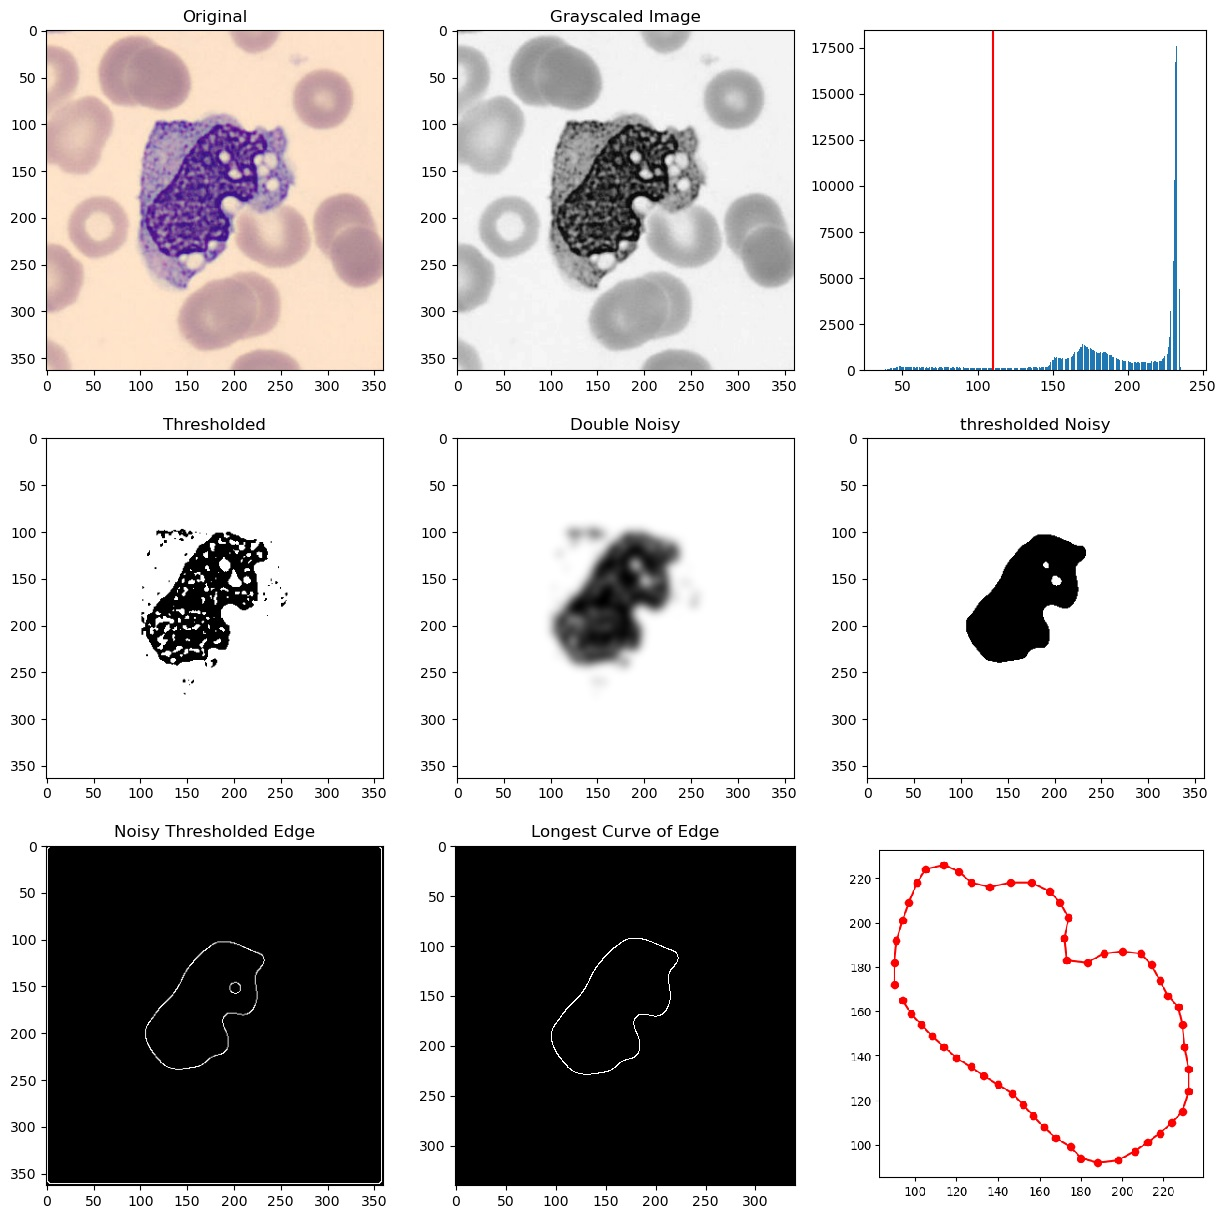

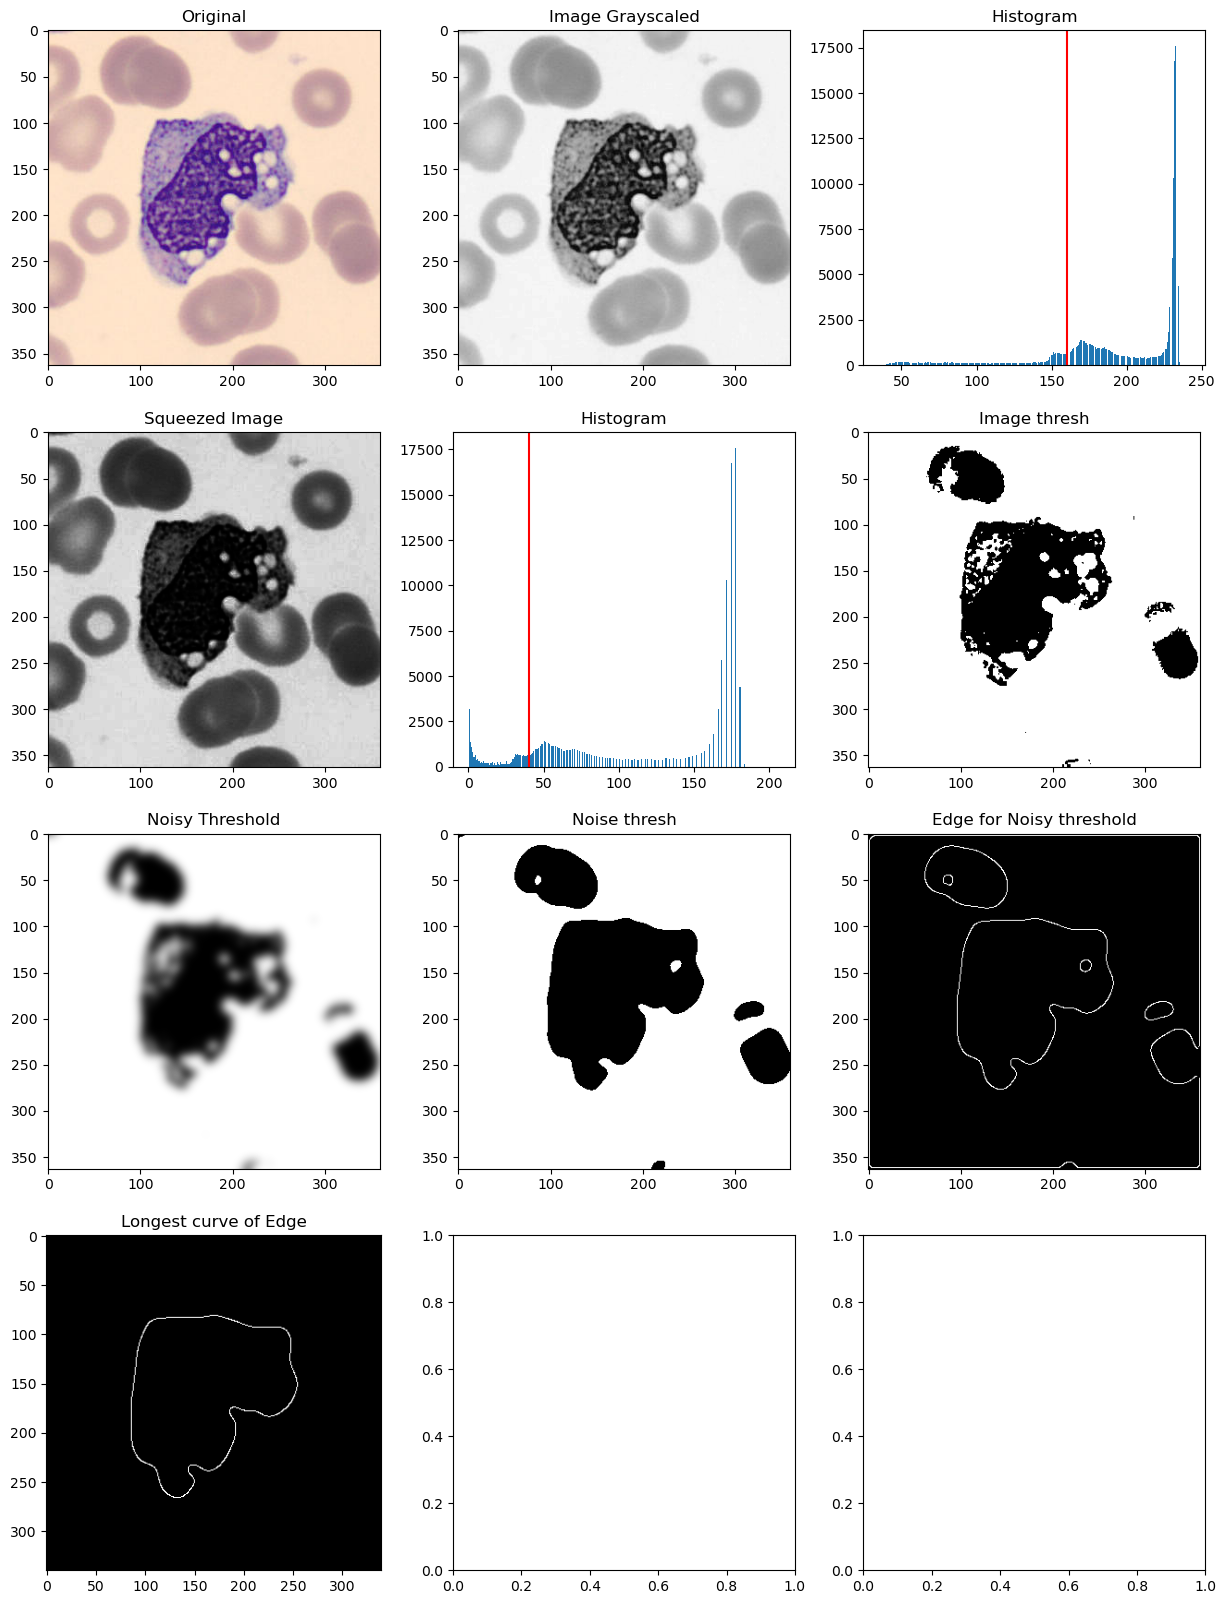

## Shape Analysis

As we know, in order to work with the shape information we must first quotient as much information as possible. In our case this means changing each curve to have a length of 1, centering them at the origin, and aligning by rotation.

We would like to quotient by parameterization, however, we face a bug when attempting to do this. 

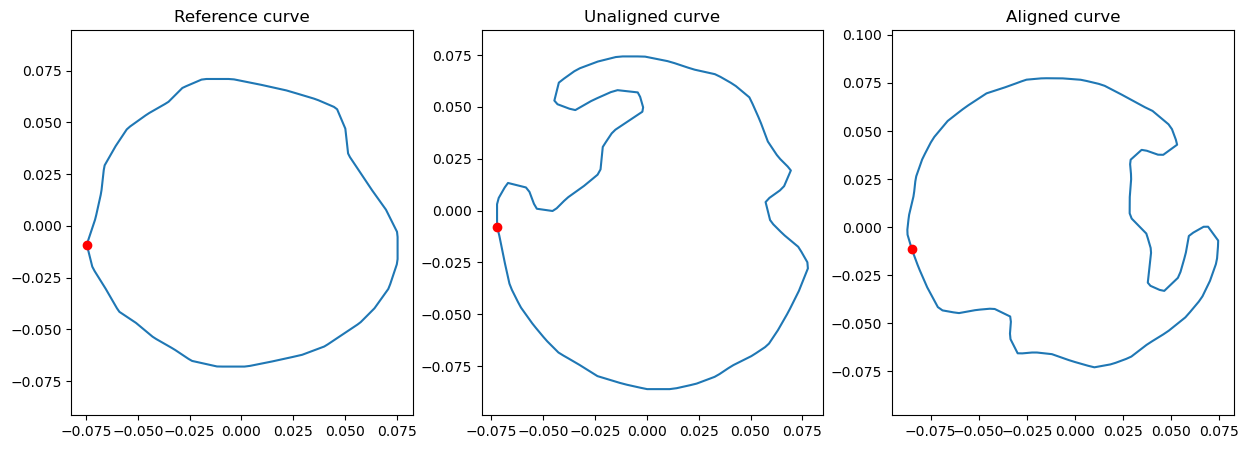

## Why Not CNN?

Well lets run one and see for ourselves

In [ ]:
data_dir = '/Users/jakebentley/Desktop/BloodCells'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size= 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

class_names = train_ds.class_names
print(class_names)

Output: 

Found 14745 files belonging to 7 classes.
Using 11796 files for training.

Found 14745 files belonging to 7 classes.
Using 2949 files for validation.

['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil']


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

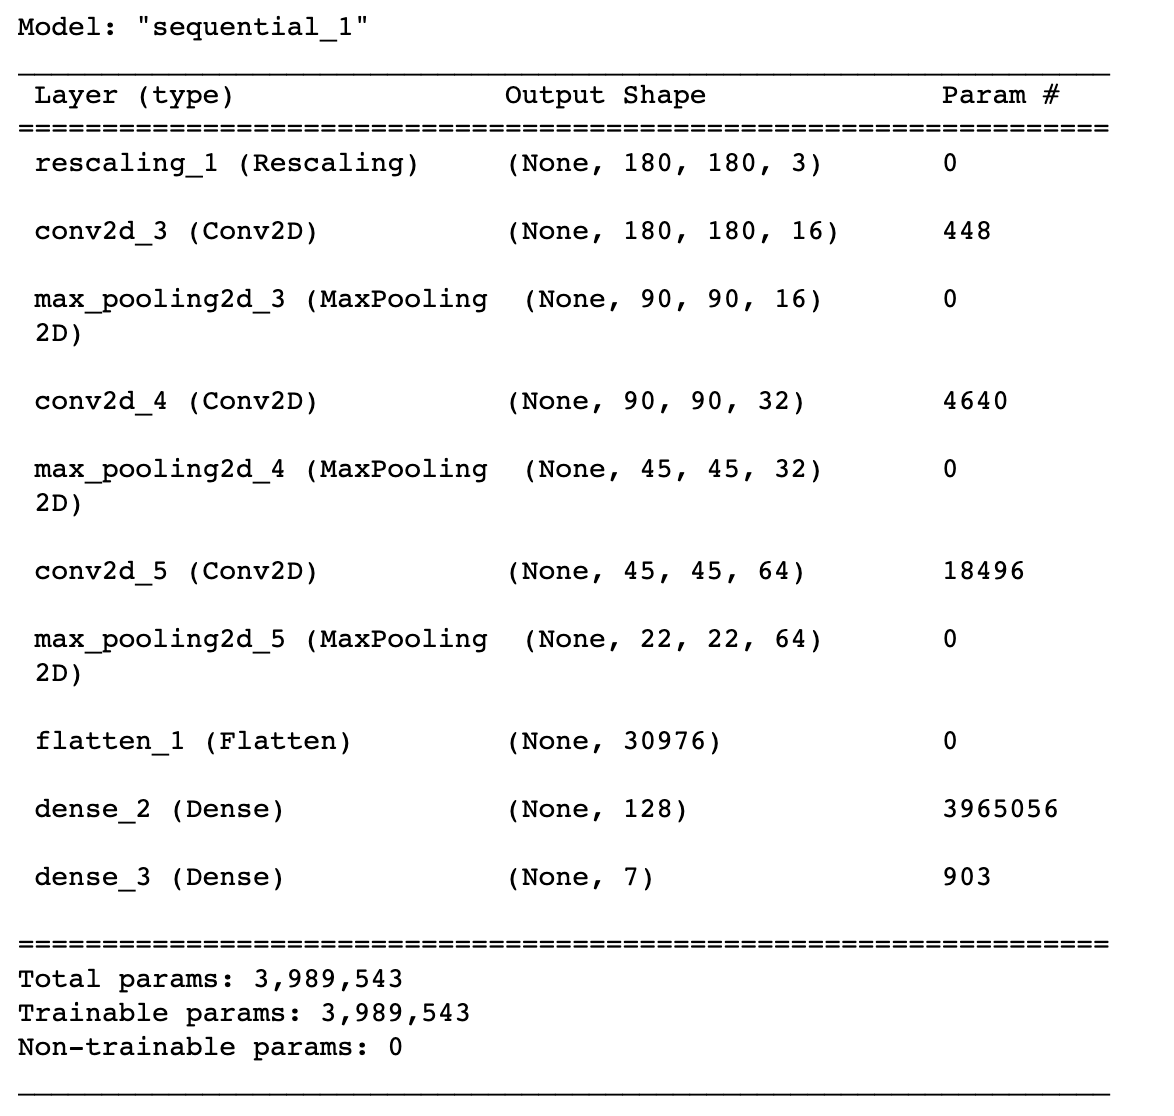

What is going on?

We have a simple 8 layer CNN:

*  First we rescale
*  16 (3X3) Kernel Filters then Normalize with ReLu function
*  Max pool to reduce the spatial dimension
*  32 (3X3) Kernel Filters then Normalize with ReLu function
*  Max pool to reduce the spatial dimension
*  64 (3X3) Kernel Filters then Normalize with ReLu function
*  Max pool to reduce the spatial dimension
*  We flatten each output array and stack it as a list 
*  Then use tuned weights to give us an output of list of 128 numbers
*  The used tuned weights to give us an output of which class the CNN predicts the image belongs to



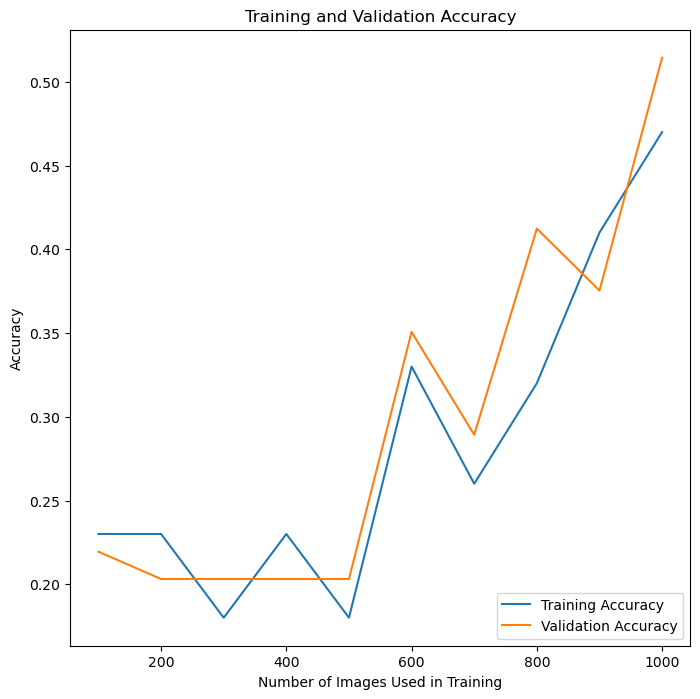

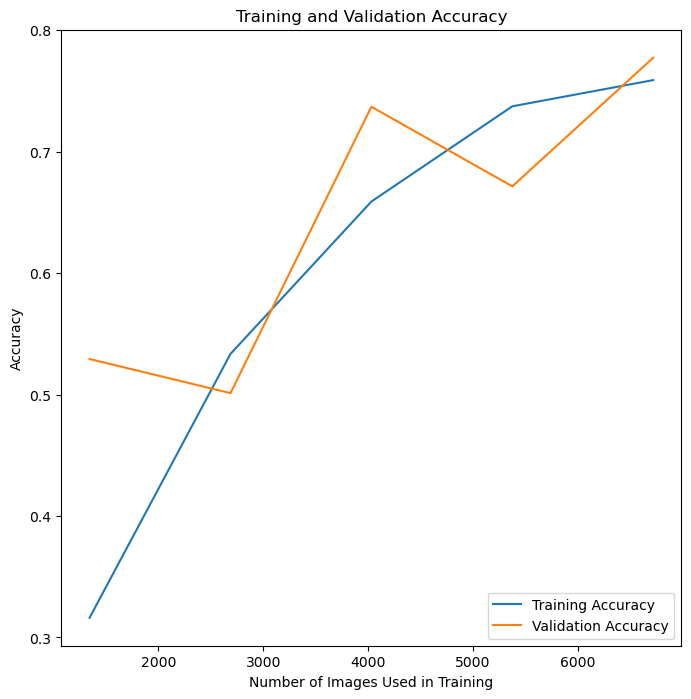

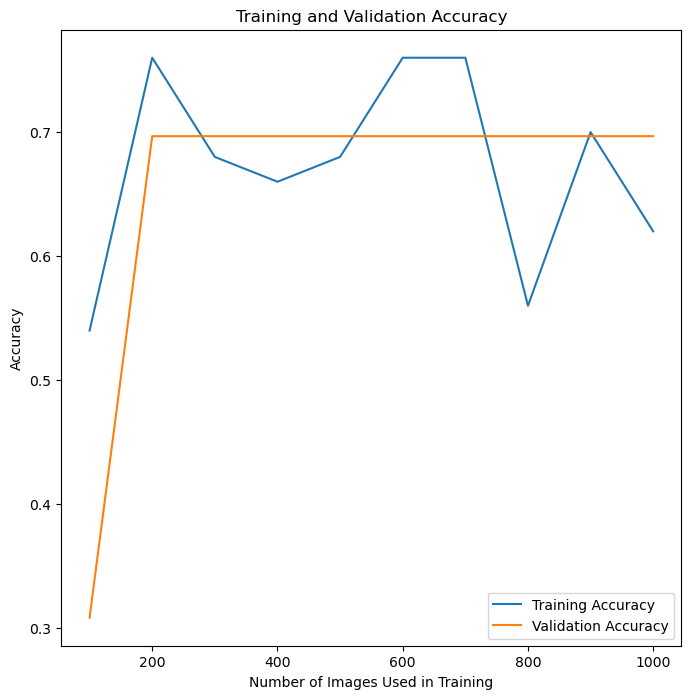

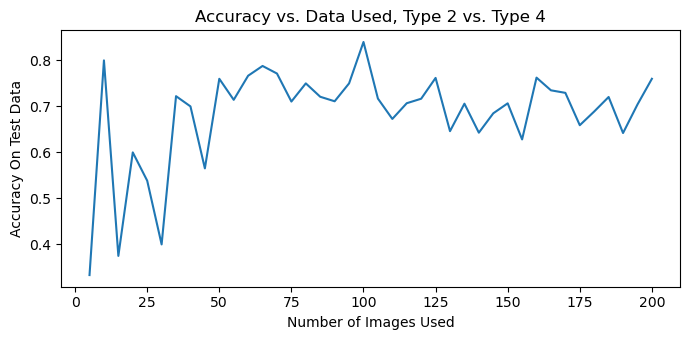

Some of the disadvantages of CNNs:

*   They don't encode position and orientation well
*   Needs a lot of data for training
*   Recognize the image as clusters of pixels which are arranged in distinct
patterns. They don’t understand them as components of the image.

Issues with most medical cell data:

*   The cells caputered in the images can be in different parts of the image
*   It is hard to get a lot of cell data (our dataset is one of the exceptions)
*   Classification of cells was done based off of sight. Humans are good at reconizing shapes and relationships between shapes. Not relationships between pixels

How Geometric Machine Learning resolves some of these issues:

*  We are just extracting shape of nucleus. Position is irrelavent to us
*  Based off of the results we do not need much data at all to have a classification system
*  Treats images of cells like humans would. Looks at shape of nucleus and difference between shape of nucleus for each class




